# Homework 3 - Introduction to Data Science - Fall 2021

# Guidelines
- If asked to fit a model to given data, do not preprocess the given data before fitting. 
- Use default values for any parameters not mentioned in a problem statement.
- Comment where appropriate for clarity.

# Problem 1

We will apply decision trees to the `Titanic` dataset for prediction of passenger survival. The dataset contains the following variables:

* `Pclass`: Ticket class where 1 = 1st, 2 = 2nd, 3 = 3rd
* `Sex`: Female/male
* `Embarked`: Port of Embarkation where C = Cherbourg, Q = Queenstown, S = Southampton
* `SibSp`: Number of siblings
* `Parch`: Number of parents
* `Age`: Age in years	
* `Fare`: Passenger fare	
* `Survived`: 0 = No, 1 = Yes

In [80]:
import pandas as pd

titanic = pd.read_csv("titanic.csv")

# Select subset of columns.
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Age','Fare','Survived']
titanic = titanic[columns]

# Fill NA values.
titanic['Embarked'].fillna("S", inplace=True)
med_age = int(titanic['Age'].median())
titanic['Age'].fillna(med_age, inplace=True)

# Encode classes as integers.
titanic['Sex'] = titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
titanic['Embarked'] = titanic['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

# Print.
titanic

,Pclass,Sex,Embarked,SibSp,Parch,Age,Fare,Survived
0,3,1,1,1,0,22.0,7.2500,0
1,1,0,2,1,0,38.0,71.2833,1
2,3,0,1,0,0,26.0,7.9250,1
3,1,0,1,1,0,35.0,53.1000,1
4,3,1,1,0,0,35.0,8.0500,0
...,...,...,...,...,...,...,...,...
886,2,1,1,0,0,27.0,13.0000,0
887,1,0,1,0,0,19.0,30.0000,1
888,3,0,1,1,2,28.0,23.4500,0
889,1,1,2,0,0,26.0,30.0000,1


In [4]:
from sklearn.model_selection import train_test_split

# Test/train split.
X_titan = titanic.drop('Survived', axis = 1)
y_titan = titanic[['Survived']]
X_titan_train, X_titan_test, y_titan_train, y_titan_test = train_test_split(X_titan, y_titan, test_size=1/3, random_state=42)

## 1.1
For `max_depth` ranging from 1 to 50, fit decision tree classifiers using `random_state=42` and store the training and test accuracies in the given variables.

Best prediction accuracy:  0.8215488215488216
Depth:  3


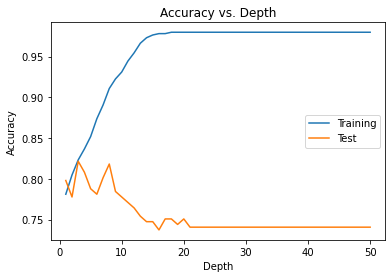

In [79]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

depth = np.arange(1,51,1)
dtaccuracy_train = [] # List for storing training accuracies.
dtaccuracy_test = [] # List for storing test accuracies.

### YOUR CODE HERE:
models = []
for i in range(1,51):
    clf = tree.DecisionTreeClassifier(max_depth=i,random_state=42).fit(X_titan_train, y_titan_train)
    models.append(clf)
    y_pred_test = clf.predict(X_titan_test)
    y_pred_train = clf.predict(X_titan_train)
    dtaccuracy_test.append(accuracy_score(y_pred_test,y_titan_test))
    dtaccuracy_train.append(accuracy_score(y_pred_train, y_titan_train))
    
print("Best prediction accuracy: ", max(dtaccuracy_test))
print("Depth: ", depth[dtaccuracy_test.index(max(dtaccuracy_test))])

plt.plot(depth, dtaccuracy_train, label = "Training")
plt.plot(depth, dtaccuracy_test, label = "Test")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Depth")
plt.legend()
plt.show()

## 1.2
What trends do you observe in the training and test accuracies as depth increases? Explain these trends.

### Answer:
As depth increases, the model shows an overfitting pattern, leading to a poor performance on the test data set.

## 1.3
For the decision tree with the best test accuracy, print the three most important features.

In [106]:
# YOUR CODE HERE:
print(np.array(columns)[models[2].feature_importances_.argsort()[-3:]])

['Pclass' 'Fare' 'Sex']


# Problem 2
We continue to explore prediction on the `Titanic` dataset with random forests.

## 2.1
For `n_estimators` ranging from 1 to 201 with step size 10, fit random forest classifiers using `random_state=42` and `max_depth=3`. Store the training and test accuracies in the given variables.

Best prediction accuracy 0.8282828282828283
Corredsponding n_estimators 101


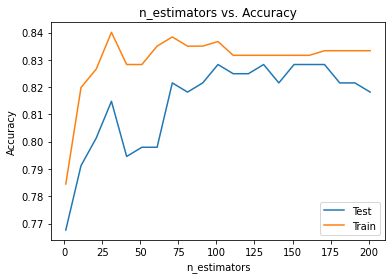

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rf_arru_lst_test = [] # List for storing training accuracies.
rf_arru_lst_train = [] # List for storing test accuracies.
n_estimators_lst = np.arange(1,202,10)


# YOUR CODE HERE:
models = []
for i in range(1, 202,10):
    clf = RandomForestClassifier(n_estimators=i, random_state=42, max_depth=3).fit(X_titan_train, y_titan_train)
    models.append(clf)
    rf_arru_lst_train.append(accuracy_score(clf.predict(X_titan_train), y_titan_train))
    rf_arru_lst_test.append(accuracy_score(clf.predict(X_titan_test), y_titan_test))
    
# print "Best prediction accuracy" and corresponding "n_estimators"
# YOUR CODE HERE:
print(f'Best prediction accuracy {max(rf_arru_lst_test)}')
print(f'Corredsponding n_estimators {models[rf_arru_lst_test.index(max(rf_arru_lst_test))].n_estimators}')


# plot the accuracies
plt.plot(n_estimators_lst, rf_arru_lst_test, label = "Test")
plt.plot(n_estimators_lst, rf_arru_lst_train, label = "Train")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('n_estimators vs. Accuracy')
plt.legend()
plt.show()

In [16]:
[i for i in range(1,51,10)]

[1, 11, 21, 31, 41]

## 2.2
What trends do you observe in the training and test accuracies as `n_estimators` increases? Explain these trends.

### Answer:
I observe that the there is still an overfitting after 41 trees are attempted, but with a less severity than the previous model. Reason behind such phenomenon is that RandomForest has a limitation on the nuumber of features selected each time it extends, which drastically decreases the possibility of overfitting.

## 2.3
`GridSearchCV` is a class to assist in finding the best parameters for a model. Read about `GridSearchCV` here:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

To use `GridSearchCV`, follow these steps:
* Create your model object.
* Create a dictionary with the model parameters and ranges over which you want to optimize.
* Create a `GridSearchCV` object and fit it on your training data.
* Access the attributes of the `GridSearchCV` object to find the optimal parameters and scores.

For a Random Forest model with `random_state=42`, use `GridSearchCV` with 10-fold CV to determine the best combination of the following parameters:
* `max_depth` ranging from 1 to 10
* `n_estimators` ranging from 1 to 10

Print the best parameters and corresponding score.

In [121]:
from sklearn.model_selection import GridSearchCV

# create the default model
# YOUR CODE HERE:
rf = RandomForestClassifier(random_state=42)

# Grid of parameters over which to optimize.
# YOUR CODE HERE:
params = {'max_depth':[i for i in range(1,11)],'n_estimators':[i for i in range(1,11)]}

# search the grid
# YOUR CODE HERE:
clf = GridSearchCV(rf, param_grid=params,cv=10)
clf.fit(X_titan_train,np.ravel(y_titan_train))


# Print the "Best parameters" and its "Score"
# YOUR CODE HERE:
print(f"Best estimator: {clf.best_estimator_}\nScore:{clf.best_score_}")

Best estimator: RandomForestClassifier(max_depth=9, n_estimators=10, random_state=42)
Score:0.831638418079096


# Problem 3

We will apply logistic regression to the problem of classifying images of fashion articles in the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist).

In [28]:
import numpy as np
import pandas as pd

fash = pd.read_csv("fash.csv")
labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]
fash['label'].replace(to_replace=np.arange(0,10), value=labels, inplace=True)

X_fash = fash.iloc[:, 1:]
y_fash = fash.iloc[:, 0]

display(fash)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Pullover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shirt,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,T-shirt/top,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Dress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Bag,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,Trouser,0,0,0,0,0,0,0,0,0,...,164,0,0,0,0,0,0,0,0,0
997,Coat,0,0,0,0,0,0,0,0,1,...,0,0,0,0,170,193,11,0,0,0
998,Sneaker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.1
Fit a logistic regression model for image classification to the data with `penalty="none"`. Print the first three images using [`matplotlib.pyplot.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) along with your model classifications and the predicted probabilities of each class.

classifications: ['Pullover' 'Ankle boot' 'Shirt']
   Ankle boot            Bag          Coat          Dress       Pullover  \
0         0.0  3.957841e-142  3.684823e-77   0.000000e+00   1.000000e+00   
1         1.0  8.379433e-227  0.000000e+00   0.000000e+00  1.589731e-278   
2         0.0  1.712257e-222  8.983572e-93  1.195805e-121  6.887740e-119   

          Sandal          Shirt       Sneaker    T-shirt/top        Trouser  
0   0.000000e+00  8.693958e-167  0.000000e+00  1.104110e-246  2.578524e-220  
1  1.333352e-100  2.964394e-323  1.023284e-40   0.000000e+00  1.489360e-308  
2   0.000000e+00   1.000000e+00  0.000000e+00  1.737005e-172  1.636035e-311  


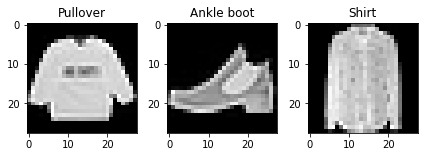

In [90]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# YOUR CODE HERE:
lgr = LogisticRegression(penalty='none').fit(X_fash,y_fash)
print(f"classifications: {lgr.predict(X_fash[:3])}")
print(pd.DataFrame(lgr.predict_proba(X_fash[:3]), columns=lgr.classes_))

width=5
height=5
rows = 1
cols = 3
axes=[]
fig=plt.figure()

for a in range(rows*cols):
    axes.append(fig.add_subplot(rows, cols, a+1))
    subplot_title=(y_fash[a])
    axes[-1].set_title(subplot_title)  
    plt.imshow(np.array(X_fash[:3])[a].reshape(28,28), cmap = "gray")
fig.tight_layout()    
plt.show()

## 3.2
In the previous part we used no penalty term. Now we will explore L2 penalization. Answer the following questions in the context of logistic regression:
1. What is L2 penalization?
2. What main benefit does it have and how does it achieve that?

### Answer:
1. L2 regularization is also called Ridge regression, and it functions as prevention of overfittting and improve the accuracy of models.
2. The form of L2 regularization is 
\begin{equation}
    \lambda * \sum_{i=0}^n {w_i^2} 
\end{equation},
so it can provide a closed form solution as a square of weights, which imposes constraints on all coefficients.

## 3.3
Fit logistic regression models to the data using L2 regularization and the given values of `C`. Determine the optimal value of the inverse regularization strength parameter $C$ by performing 5-fold cross-validation. Plot the averaged `accuracy_score` associated with the each model against $\log(C)$.

optimal C: {'C': 10.0}


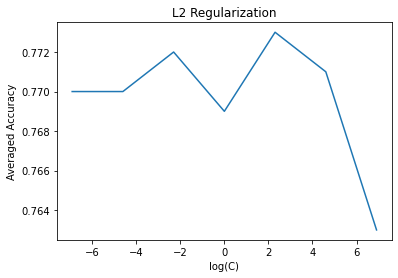

In [108]:
from numpy.linalg import norm
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

C = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
cv_scores = [0]*7 # List for storing the averaged accuracies.

# YOUR CODE HERE:
lgr = LogisticRegression()
gs = GridSearchCV(lgr,param_grid={'C':C},cv=5)
gs.fit(X_fash,y_fash)
# Print the "Optimal C"
# YOUR CODE HERE:
print(f"optimal C: {gs.best_params_}")
cv_scores = gs.cv_results_['mean_test_score']
plt.plot(np.log(C), cv_scores)
plt.xlabel("log(C)")
plt.ylabel("Averaged Accuracy")
plt.title("L2 Regularization")
plt.show()

## 3.4
Perform a random 80/20 split into training and test data set and use the optimal `C` of Problem 3.3 to train a logistic regression model. Plot the confusion matrix of the test set.

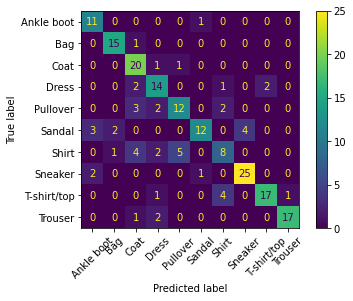

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_fash,y_fash,test_size=0.2,random_state=42)
model = LogisticRegression(C=10).fit(X_train, y_train)
#y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test,xticks_rotation=45)
# YOUR CODE HERE:


## 3.5
For this model, which is the class label with the lowest classification accuracy in the test set?

### Answer:
Shirt label is the one with lowest classification accuracy


# Problem 4

We explore classification using support vector machines (SVM) on the [`wine`](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset) dataset. Wines are divided into class 0 and class 1.

     color_intensity   hue
0               5.64  1.04
1               4.38  1.05
2               5.68  1.03
3               7.80  0.86
4               4.32  1.04
..               ...   ...
173             7.70  0.64
174             7.30  0.70
175            10.20  0.59
176             9.30  0.60
177             9.20  0.61

[178 rows x 2 columns]
0      1
1      1
2      1
3      1
4      1
      ..
173    0
174    0
175    0
176    0
177    0
Name: target, Length: 178, dtype: int32


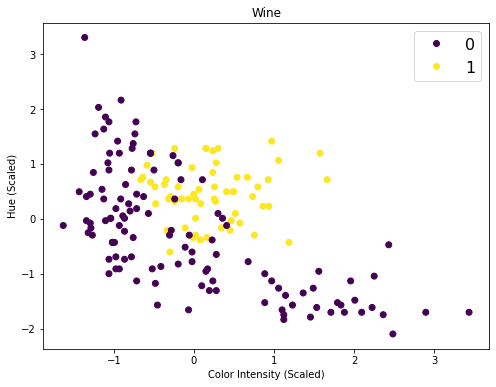

In [122]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

X_wine = datasets.load_wine(as_frame = True).data[['color_intensity', 'hue']]
y_wine = (datasets.load_wine(as_frame = True).target == 0)*1

print(X_wine)
print(y_wine)

# Scale X_wine.
scaler = StandardScaler()
X_wine = scaler.fit_transform(X=X_wine)

fig, ax = plt.subplots(figsize=(8,6));
scatter = ax.scatter(X_wine[:,0], X_wine[:,1],c=y_wine)
ax.legend(handles=scatter.legend_elements()[0],labels=['0','1'], fontsize=16);
ax.set_xlabel("Color Intensity (Scaled)")
ax.set_ylabel("Hue (Scaled)")
ax.set_title("Wine");

## 4.1
Fit an SVM model with a linear kernel to the whole dataset and print the accuracy on the whole dataset.

In [58]:
from sklearn.metrics import accuracy_score
from sklearn import svm

# YOUR CODE HERE:
print(accuracy_score(svm.SVC(kernel="linear").fit(X_wine,y_wine).predict(X_wine),y_wine))

0.6853932584269663


## 4.2
Describe qualitatively why SVM with linear kernel has limited accuracy for this dataset.

### Answer:
The dimensionality of our dataset is 2, and from the plot in previous part we can tell that there are many overlapped points, which imposes a limitation on SVM's perforamce since the hyperplane itself is bound by the dimensions of the dataset

## 4.3
Perform 10-fold CV with the following two SVM models:
- One using an RBF kernel with C=1.
- One using an RBF kernel with C=1e4.

Print the mean 10-fold CV accuracies of the models.

In [88]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import cross_val_score

# YOUR CODE HERE:
model = svm.SVC(kernel='rbf')
params = {'C':[1,1e4]}
gs = GridSearchCV(model,param_grid=params,cv=10)
gs.fit(X_wine,y_wine)

# Print the 'C=1 Mean Accuracy' and the 'C=1e4 Mean Accuracy'
# YOUR CODE HERE:
print(f"model1: {gs.cv_results_['mean_test_score'][0]}\nmodel2: {gs.cv_results_['mean_test_score'][1]}")

model1: 0.8549019607843137
model2: 0.8379084967320262


## 4.4
For each of the two models, create a plot showing:
- The decision boundaries and margins, and
- the support vectors (highlighted).

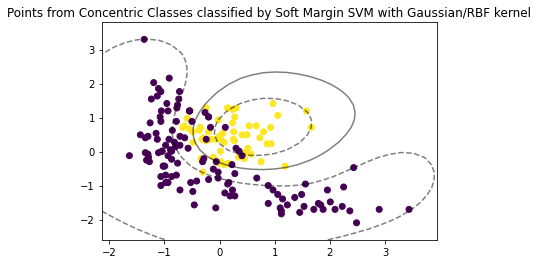

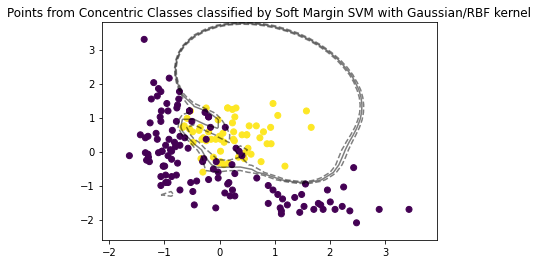

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid to evaluate model
# YOUR CODE HERE:

# Fit the model with C=1.
# YOUR CODE HERE:
model1 = svm.SVC(kernel='rbf',C=1).fit(X_wine,y_wine)
xx = np.linspace(X_wine[:,0].min()-0.5, X_wine[:,0].max()+0.5, 30)
yy = np.linspace(X_wine[:,1].min()-0.5, X_wine[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model1.decision_function(xy).reshape(XX.shape)
plt.scatter(X_wine[:,0], X_wine[:,1], c=y_wine);
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.title("Points from Concentric Classes classified by Soft Margin SVM with Gaussian/RBF kernel")
plt.show()

# Fit the model with C=1e4.
# YOUR CODE HERE:
model2 = svm.SVC(kernel='rbf',C=1e4).fit(X_wine,y_wine)

# Plot decision boundary and margins
# YOUR CODE HERE:
xx = np.linspace(X_wine[:,0].min()-0.5, X_wine[:,0].max()+0.5, 30)
yy = np.linspace(X_wine[:,1].min()-0.5, X_wine[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model2.decision_function(xy).reshape(XX.shape)
plt.scatter(X_wine[:,0], X_wine[:,1], c=y_wine);
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.title("Points from Concentric Classes classified by Soft Margin SVM with Gaussian/RBF kernel")
plt.show()